# Text Classification with CNN

In [0]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
# import data from URL
# raw data size is 100 000
DATA_URL = "https://limportant.fr?page=export-csv&nb_lines=100000"
data_path = tf.keras.utils.get_file(fname="data_export_2018-06-01.csv", origin=DATA_URL)

6709248/Unknown - 2s 0us/step

23175168/Unknown - 7s 0us/step

In [4]:

CSV_COLUMN_NAMES = ['text','category_id']
all_data = pd.read_csv(filepath_or_buffer=data_path, names=CSV_COLUMN_NAMES, header=0, engine='python')
all_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 2 columns):
text           93737 non-null object
category_id    100000 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


In [0]:
# drop the tweets with null text and the tweets of partenaires

all_data.loc[all_data['category_id'] == 57, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 59, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 73, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 80, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 93, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 107, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 38, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 39, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 53, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 83, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 85, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 86, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 87, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 88, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 89, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 90, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 94, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 96, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 97, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 98, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 99, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 100, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 102, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 103, 'text'] = np.nan
all_data.loc[all_data['category_id'] == 106, 'text'] = np.nan

all_data.dropna(subset=['text'],inplace=True)

In [0]:
# tranform category_id into [0,12] 

all_data.loc[all_data['category_id'] == 50, 'category_id'] = 10
all_data.loc[all_data['category_id'] == 56, 'category_id'] = 11
all_data.loc[all_data['category_id'] == 69, 'category_id'] = 12
all_data.loc[all_data['category_id'] == 101, 'category_id'] = 0

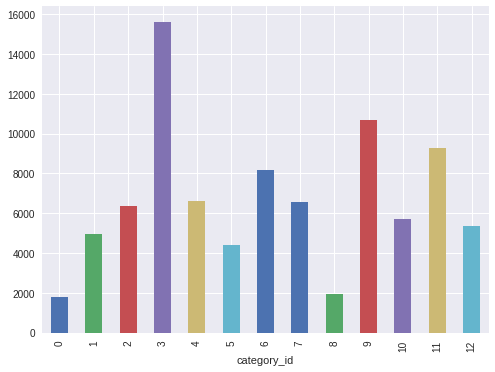

In [7]:
# show the raw data
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
all_data.groupby('category_id').text.count().plot.bar(ylim=0)
plt.show()

- 0 : Trump
- 1 : Politique
- 2 : Economie
- 3 : Monde
- 4 : Régions
- 5 : Santé
- 6 : Culture
- 7 : Tech
- 8 : Sport
- 9 : Société
- 10 : Afrique
- 11 : Planète
- 12 : Moyen-orient 

In [8]:

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87449 entries, 0 to 99998
Data columns (total 2 columns):
text           87449 non-null object
category_id    87449 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.0+ MB


## 1. Pre-processing the text

### 1.1 Tokenize and get rid of stopwords

In [9]:
# tokenize and get rid of stopwords
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
import string


text = 'Corée du Nord: une chaine pro-Kremlin trafique une photo de Kim Jong-un pour le faire sourire'

stop = list(string.punctuation) + ["«", "»", "“", "”","’"]
toknizer = RegexpTokenizer(r'''\'|\w+|[^\w\s]''')
print(toknizer.tokenize(text.strip().lower()))
token = [i for i in toknizer.tokenize(text.strip().lower()) if i not in stop]
str1 = ''.join(str(e)+' ' for e in token)
print(str1)

['corée', 'du', 'nord', ':', 'une', 'chaine', 'pro', '-', 'kremlin', 'trafique', 'une', 'photo', 'de', 'kim', 'jong', '-', 'un', 'pour', 'le', 'faire', 'sourire']
corée du nord une chaine pro kremlin trafique une photo de kim jong un pour le faire sourire 


In [10]:
text_token = []

for tweet in all_data['text']:
  token = [i for i in toknizer.tokenize(tweet.strip().lower()) if i not in stop]
  text = ''.join(str(e)+' ' for e in token)
  text_token.append(text)
  
all_data['text_token'] = text_token
all_data.head()

,text,category_id,text_token
0,Bertrand Cantat laisse entendre qu'il ne remon...,9,bertrand cantat laisse entendre qu il ne remon...
1,"Pour ses 15 ans, la sonde Mars Express nous of...",11,pour ses 15 ans la sonde mars express nous off...
2,"En Arabie saoudite, coup d'arrêt aux droits de...",12,en arabie saoudite coup d arrêt aux droits des...
4,Étude McKinsey : les femmes restent sous-repré...,9,étude mckinsey les femmes restent sous représe...
5,Cioran : «S’il y a quelqu’un qui doit tout à B...,6,cioran s il y a quelqu un qui doit tout à bach...


## 2 CNN without word2vec

### 2.1 Hyerparameter

In [35]:
MAX_SEQUENCE_LENGTH = max([len(x.split(" ")) for x in all_data['text_token']])
EMBEDDING_DIM = 500
VALIDATION_SPLIT = 0.16
TEST_SPLIT = 0.2
print(MAX_SEQUENCE_LENGTH)

81


### 2.2 Creating features and label

- Features : create a vocabulary, every word will have an index in vocabulary, and then we transform a text into a vector with indexs. We fix the length of each vector with MAX_SEQUENCE_LENGTH. We fill 0 into the place of no words.

- Labels : we one-hot encode the category_id. For example, 1 -> [1,0,0], if we have 3 category_id (1,2,3)

In [36]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_data['text_token'])
sequences = tokenizer.texts_to_sequences(all_data['text_token'])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
features = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(all_data['category_id']))
print('Shape of feature tensor:', features.shape)
print('Shape of label tensor:', labels.shape)

Found 104731 unique tokens.
Shape of feature tensor: (87449, 81)
Shape of label tensor: (87449, 13)


### 2.3 Spliting into train/test/validation set

In [0]:
# shuffle the dataset
np.random.seed(10)
shuffle_indices = np.random.permutation(np.arange(len(all_data['text'])))
x_shuffled = features[shuffle_indices]
y_shuffled = labels[shuffle_indices]

In [38]:
p1 = int(len(all_data['text'])*(1-VALIDATION_SPLIT-TEST_SPLIT))
p2 = int(len(all_data['text'])*(1-TEST_SPLIT))
x_train = x_shuffled[:p1]
y_train = y_shuffled[:p1]
x_val = x_shuffled[p1:p2]
y_val = y_shuffled[p1:p2]
x_test = x_shuffled[p2:]
y_test = y_shuffled[p2:]
print ('train docs: {}'.format(len(x_train)))
print ('val docs: {}'.format(len(x_val)))
print ('test docs: {}'.format(len(x_test)))

train docs: 55967
val docs: 13992
test docs: 17490


### 2.3 Modeling

> In our model, there are 7 layers

> **[ batch_size, In_height, In_width, channels ]** is the tensor of each layer. 81 is MAX_SEQUENCE_LENGTH

0. Input layer: batch_size of texts. **[ batch_size, 81, 1, 1 ]**. 

1. Embedding: we drop 104706 dimension down to 200 dimension ramdomly. (after, we will improve it with word2vec). Now, we can describe a text in 200 dimension. **[ batch_size, 81, Embedding_dim, 1 ]** 

2. Dropout: we drop out 20% data for avoiding overfiting. **[ batch_size, 81, Embedding_dim, 1 ]**

3. Covolution: we use num_filtres of  **[ 3, 81 ]** filtres to convolue the Input. **[ batch_size, 79, 1, num_filtres ]**

4. MaxPooling: we pick the biggest number in three numbers to avoiding overfitting. **[ batch_size, 26, 1, num_filtres ]**

5. Full-connected: we flatten the channels into one channel, and set the number which is <=0 into 0.  **[ batch_size, 26 * num_filtres 1, 1 ]**

6. Full-connected:: we drop into 13 dimension, which represente 13 categories. **[ batch_size, 13, 1, 1 ]**

7. Softmax: we show the probability of the text in each categories

In [39]:
from keras.layers import Dense, Input, Flatten, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

model = Sequential()
model.add(Embedding(len(word_index) + 1, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.2))
model.add(Conv1D(400, 3, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(3))
model.add(Flatten())
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dense(labels.shape[1], activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 81, 500)           52366000  
_________________________________________________________________
dropout_4 (Dropout)          (None, 81, 500)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 79, 400)           600400    
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 26, 400)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10400)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               5200500   
_________________________________________________________________
dense_8 (Dense)              (None, 13)                6513      
Total para

### 2.4 Training

In [40]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3, batch_size=128)
model.save('cnn_simple.h5')
print (model.evaluate(x_test, y_test))

Train on 55967 samples, validate on 13992 samples
Epoch 1/3
55967/55967 [==============================] - 41s 735us/step - loss: 1.4847 - acc: 0.5228 - val_loss: 1.0105 - val_acc: 0.6851
Epoch 2/3
16640/55967 [=======>......................] - ETA: 27s - loss: 0.6600 - acc: 0.7926

55967/55967 [==============================] - 40s 722us/step - loss: 0.6804 - acc: 0.7831 - val_loss: 0.9354 - val_acc: 0.7114
Epoch 3/3
42624/55967 [=====================>........] - ETA: 9s - loss: 0.3883 - acc: 0.8736

17490/17490 [==============================] - 3s 181us/step
[1.0169708002765496, 0.7024013722263247]


### 3. Prediction

### 3.1 Get the raw prediction

In [41]:
tweet = "Âgé de 80 000 ans : cet arbre se renouvelle grâce aux racines le liant aux autres troncs"
token = [i for i in toknizer.tokenize(tweet.strip().lower()) if i not in stop]
text = ''.join(str(e)+' ' for e in token)
print(text)
sequences = tokenizer.texts_to_sequences([text])
test = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

predict = model.predict(test)
score = predict[0].tolist()
print(score.index(max(score)))
print(score)



âgé de 80 000 ans cet arbre se renouvelle grâce aux racines le liant aux autres troncs 
11
[0.0006332632037810981, 0.0033158445730805397, 0.03901057317852974, 0.008873432874679565, 0.04070765897631645, 0.21666322648525238, 0.031154023483395576, 0.044108808040618896, 0.0013998107751831412, 0.07540527731180191, 0.0019363416358828545, 0.5361000895500183, 0.0006916325655765831]


### 3.2 Create a recommended list

In [87]:
category_label = [i for i in range(13)]
d_raw = dict(zip(score, category_label))
items = d_raw.items()
d = sorted(items, reverse=True)
recommended_list_raw = [i[1] for i in d]
print(recommended_list_raw)
recommended_list = []
for i in range(13):
  category_id = recommended_list_raw[i]
  if (recommended_list_raw[i] == 0):
    category_id = 101
  if (recommended_list_raw[i] == 10):
    category_id = 50
  if (recommended_list_raw[i] == 11):
    category_id = 56
  if (recommended_list_raw[i] == 12):
    category_id = 69
  recommended_list.append(category_id)
print(recommended_list)


[11, 5, 9, 7, 4, 2, 6, 3, 1, 10, 8, 12, 0]
[56, 5, 9, 7, 4, 2, 6, 3, 1, 50, 8, 69, 101]


## 3. Exporting the model

### 3.1 Unload model to Google Drive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'cnn_simple.h5'})
uploaded.SetContentFile('cnn_simple.h5')
uploaded.Upload()

### 3.1 Download Tokenizer

In [0]:
import pickle
from google.colab import files 

save_tokenizer = open("tokenizer.pickle", 'wb')
pickle.dump(tokenizer, save_tokenizer)
save_tokenizer.close()

files.download('tokenizer.pickle')